# **Problem Statment**

# Predict the percentage of student based on number of study hours 

# **Import Libraries**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [103]:
url = "http://bit.ly/w-data"
df=pd.read_csv(url)

In [104]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Performing EDA**

In [105]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [106]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

By seeing this will get to know tha there is not null values in our data

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

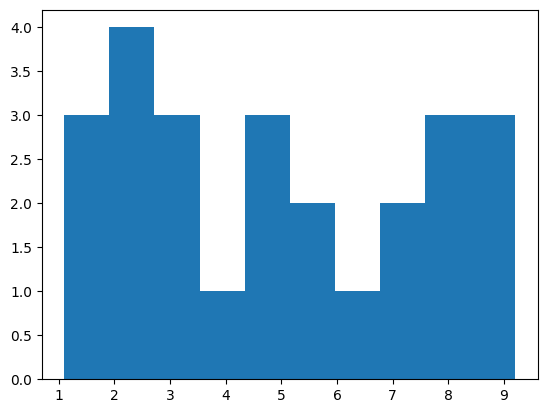

In [107]:
#checking the histogram of feature column
plt.hist(df['Hours'])

<Axes: xlabel='Hours', ylabel='Density'>

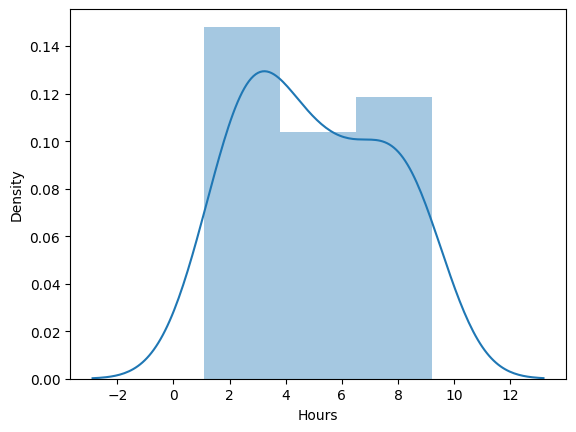

In [108]:
#checking the distplot of feature column
sns.distplot(df.Hours)

The distplot of the feature column is normally distributed so there is no outliers in feature column.

<Axes: xlabel='Scores', ylabel='Density'>

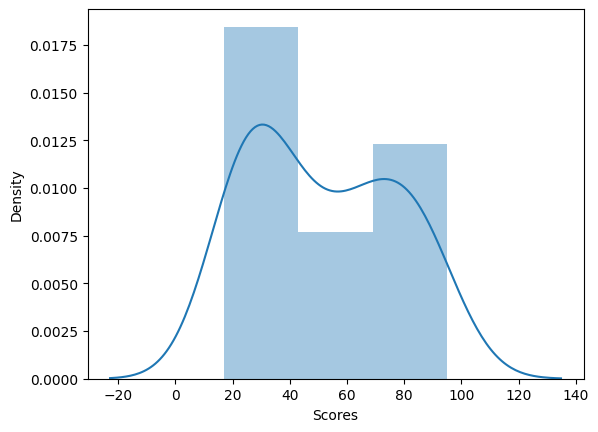

In [109]:
#checking the distplot of the target column
sns.distplot(df.Scores)


The distplot of the target column is normally distributed so there is no outliers in target column

In [110]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


by checking the correlation of the data we will get to know tha the feature is 97% corelated with the target.

<Axes: xlabel='Hours', ylabel='Scores'>

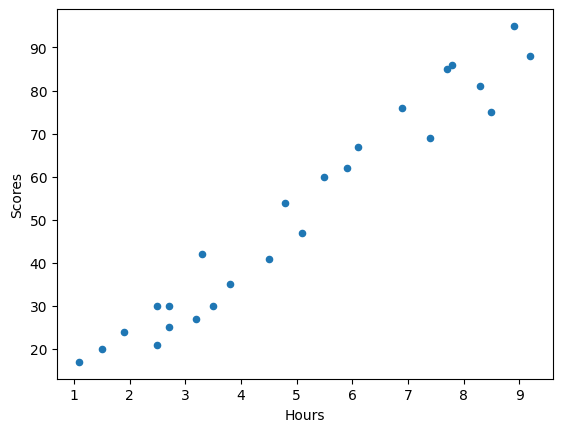

In [111]:
df.plot('Hours','Scores',kind='scatter')

# **Preparing the data**

In [112]:
#dividing the data into x and y i.e feature and target column
x = df ['Hours'].values.reshape(-1,1)
y = df ['Scores']
 

# **Splitting the data into train and test data**

In [113]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# **Training the model**

In [114]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression() 
reg.fit(x_train,y_train)

LinearRegression()

we are using simple linear regression algorithm as we have sigle feature and single target.also we have trained our simple linear regression model.

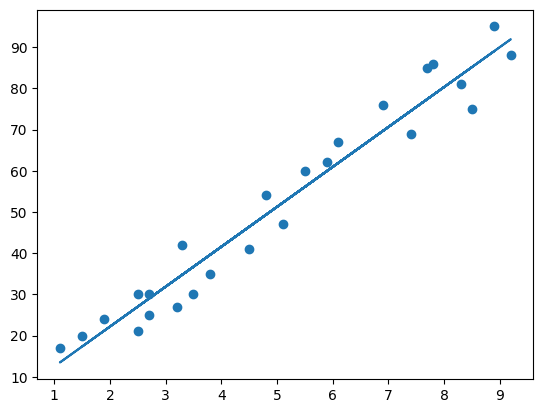

In [115]:
 #Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# **Making the prediction by using trained model**

In [116]:
y_pred=reg.predict(x_test)

In [117]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

# Now we have to compare the actual values and predicted values

In [118]:
data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


# **Checking the accuracy of the model**

In [119]:
reg.score(x_train,y_train)

0.9491209376364416

By seeing this we will get to know that the training accuracy of our model is 94% .So our model is not overfitted.

In [120]:
reg.score(x_test,y_test)

0.9678055545167994

As our model is not overfitted so the model is predicting good on the test data and giving the test accuracy 96%.

# **Testing the model on own/unknown data**

In [122]:
own_hours = np.array(9.25).reshape(-1, 1)
own_pred = reg.predict(own_hours)
own_pred

array([92.38611528])

In [124]:
data1=pd.DataFrame({'Actual': own_hours.flatten(), 'Predicted': own_pred}) 
data1

,Actual,Predicted
0,9.25,92.386115


# **Model Evaluation**

In [125]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


This is the final step which is evluation the model.In this we have seen the mean_absolute_error which is 3.92